# Reading the data

---



In [3]:
from scipy.io import arff
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import random
import requests

In [4]:
datafile = requests.get('https://www.openml.org/data/download/18238735/phpnBqZGZ')
open("fashion.arff", "wb").write(datafile.content)

155225241

In [5]:
data = arff.loadarff('fashion.arff')
df = pd.DataFrame(data[0])

headtail = df.head().append(df.tail())
headtail

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'9'
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'3'
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'9'
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'8'
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
69999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'5'


# Visualization


## Finding Uniques


---

This section contains of the quantities and qualities of unique data in our *class* column 



In [6]:
'''https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik'''

unique_dict = {
                'unique_number': df['class'].nunique(),
                'unique_classes': df['class'].unique().tolist(),
                'unique_times_used': df['class'].value_counts().to_dict()
                }

pprint.pprint(unique_dict)

{'unique_classes': [b'9', b'0', b'3', b'2', b'7', b'5', b'1', b'6', b'4', b'8'],
 'unique_number': 10,
 'unique_times_used': {b'0': 7000,
                       b'1': 7000,
                       b'2': 7000,
                       b'3': 7000,
                       b'4': 7000,
                       b'5': 7000,
                       b'6': 7000,
                       b'7': 7000,
                       b'8': 7000,
                       b'9': 7000}}


* Label  Description
* 0  T-shirt/top
* 1  Trouser
* 2  Pullover
* 3  Dress
* 4  Coat
* 5  Sandal
* 6  Shirt
* 7  Sneaker
* 8  Bag
* 9  Ankle boot

We can find resolution by taking the square root of the all pixels which is all columns minus the *class* column

In [ ]:
res = int(math.sqrt(df.shape[1]-1))
res

28

In [ ]:
df.iloc[0][:-1]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: object

## Showing pictures

---

The easiest we can achieve this is by using **PIL** library. With this library we can easily convert our lists to objects of *Image* class. 

We need to convert our floats to bytes in order to do that. We also can use `Image.fromarray()` but I chose this method to be more agile.

In [ ]:
img_matrix = bytes([int(a) for a in df.iloc[0][:-1]])
img_original = Image.frombytes('L', (res, res), img_matrix) 
print(img_original.size)
img_original

(28, 28)


### Resizing

---

Resizing is made incredible easy with the **PIL** library too. All we need to do is to use `obj.resize()` method

This method takes two arguments, one is the desired resolution and the other is resampling mode. 

I have found that
* *ANTIALIAS* = *LANCZOS*
* *BICUBIC* = default value

(32, 32)


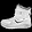

In [ ]:
img_resized = img_original.resize((32,32))
img_resized1 = img_original.resize((32,32), Image.ANTIALIAS)
img_resized2 = img_original.resize((32,32), Image.LANCZOS)
img_resized3 = img_original.resize((32,32), Image.NEAREST)
img_resized4 = img_original.resize((32,32), Image.BILINEAR)
img_resized5 = img_original.resize((32,32), Image.BICUBIC)
img_resized6 = img_original.resize((32,32), Image.ADAPTIVE)

print(img_resized.size)
img_resized

After experimenting with all of these parameters and inspecting the results of the images I decided to go with the default (BICUBIC) value. 

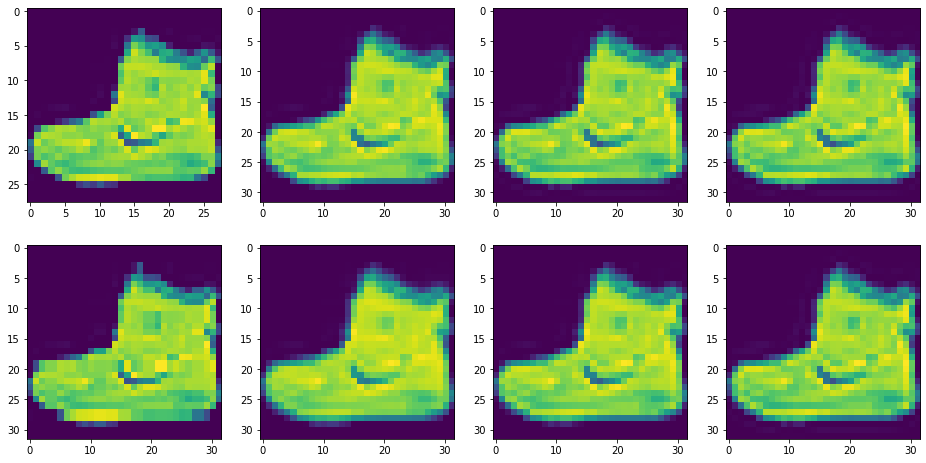

In [ ]:
size_comparison = [img_original, img_resized, img_resized1, img_resized2, img_resized3, img_resized4, img_resized5, img_resized6]
fig, axes = plt.subplots(2, 4, figsize=(16,8))

for i, ax in enumerate(axes.flat):
    ax.imshow(size_comparison[i])

## Selecting our data sample 

---

We basically take random numbers from our indicies and append their image and class data to seperate lists.

In [ ]:
'''https://stackoverflow.com/questions/2659312/how-do-i-convert-a-numpy-array-to-and-display-an-image'''

img_list = []
class_list = []
random_list = []
grid_size = 16

for j in range(grid_size*grid_size):
    random_list.append(random.randint(0, df.shape[0]))

for i in random_list:
    img_matrix = bytes([int(a) for a in df.iloc[i][:-1]])
    img = Image.frombytes('L', (res, res), img_matrix)
    img = img.resize((32,32))
    
    img_list.append(img)
    class_list.append(df.iloc[i]['class'])

Then we can find number of occurences of the classes in the current list of items.

We sum all of our occurences to assure that we are not in the wrong path.

In [ ]:
occurences = {}
for c in unique_dict['unique_classes']:
    occurences[c] = class_list.count(c)
pprint.pprint(occurences)
print(f'sum: {sum(occurences.values())}')

{b'0': 27,
 b'1': 16,
 b'2': 36,
 b'3': 22,
 b'4': 30,
 b'5': 28,
 b'6': 27,
 b'7': 19,
 b'8': 31,
 b'9': 20}
sum: 256


<BarContainer object of 10 artists>

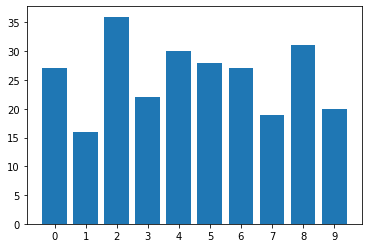

In [ ]:
plt.bar(*zip(*sorted(occurences.items())))

## Plotting the Images

---

This was the hardest part for me by a quite huge margin. I struggled finding the appropriate solution for showing the class data on the plots.

Other than that it was pretty straight forward.

I preffered to not change the byte values to strings since it would pollute the plot. I just removed the byte sign.

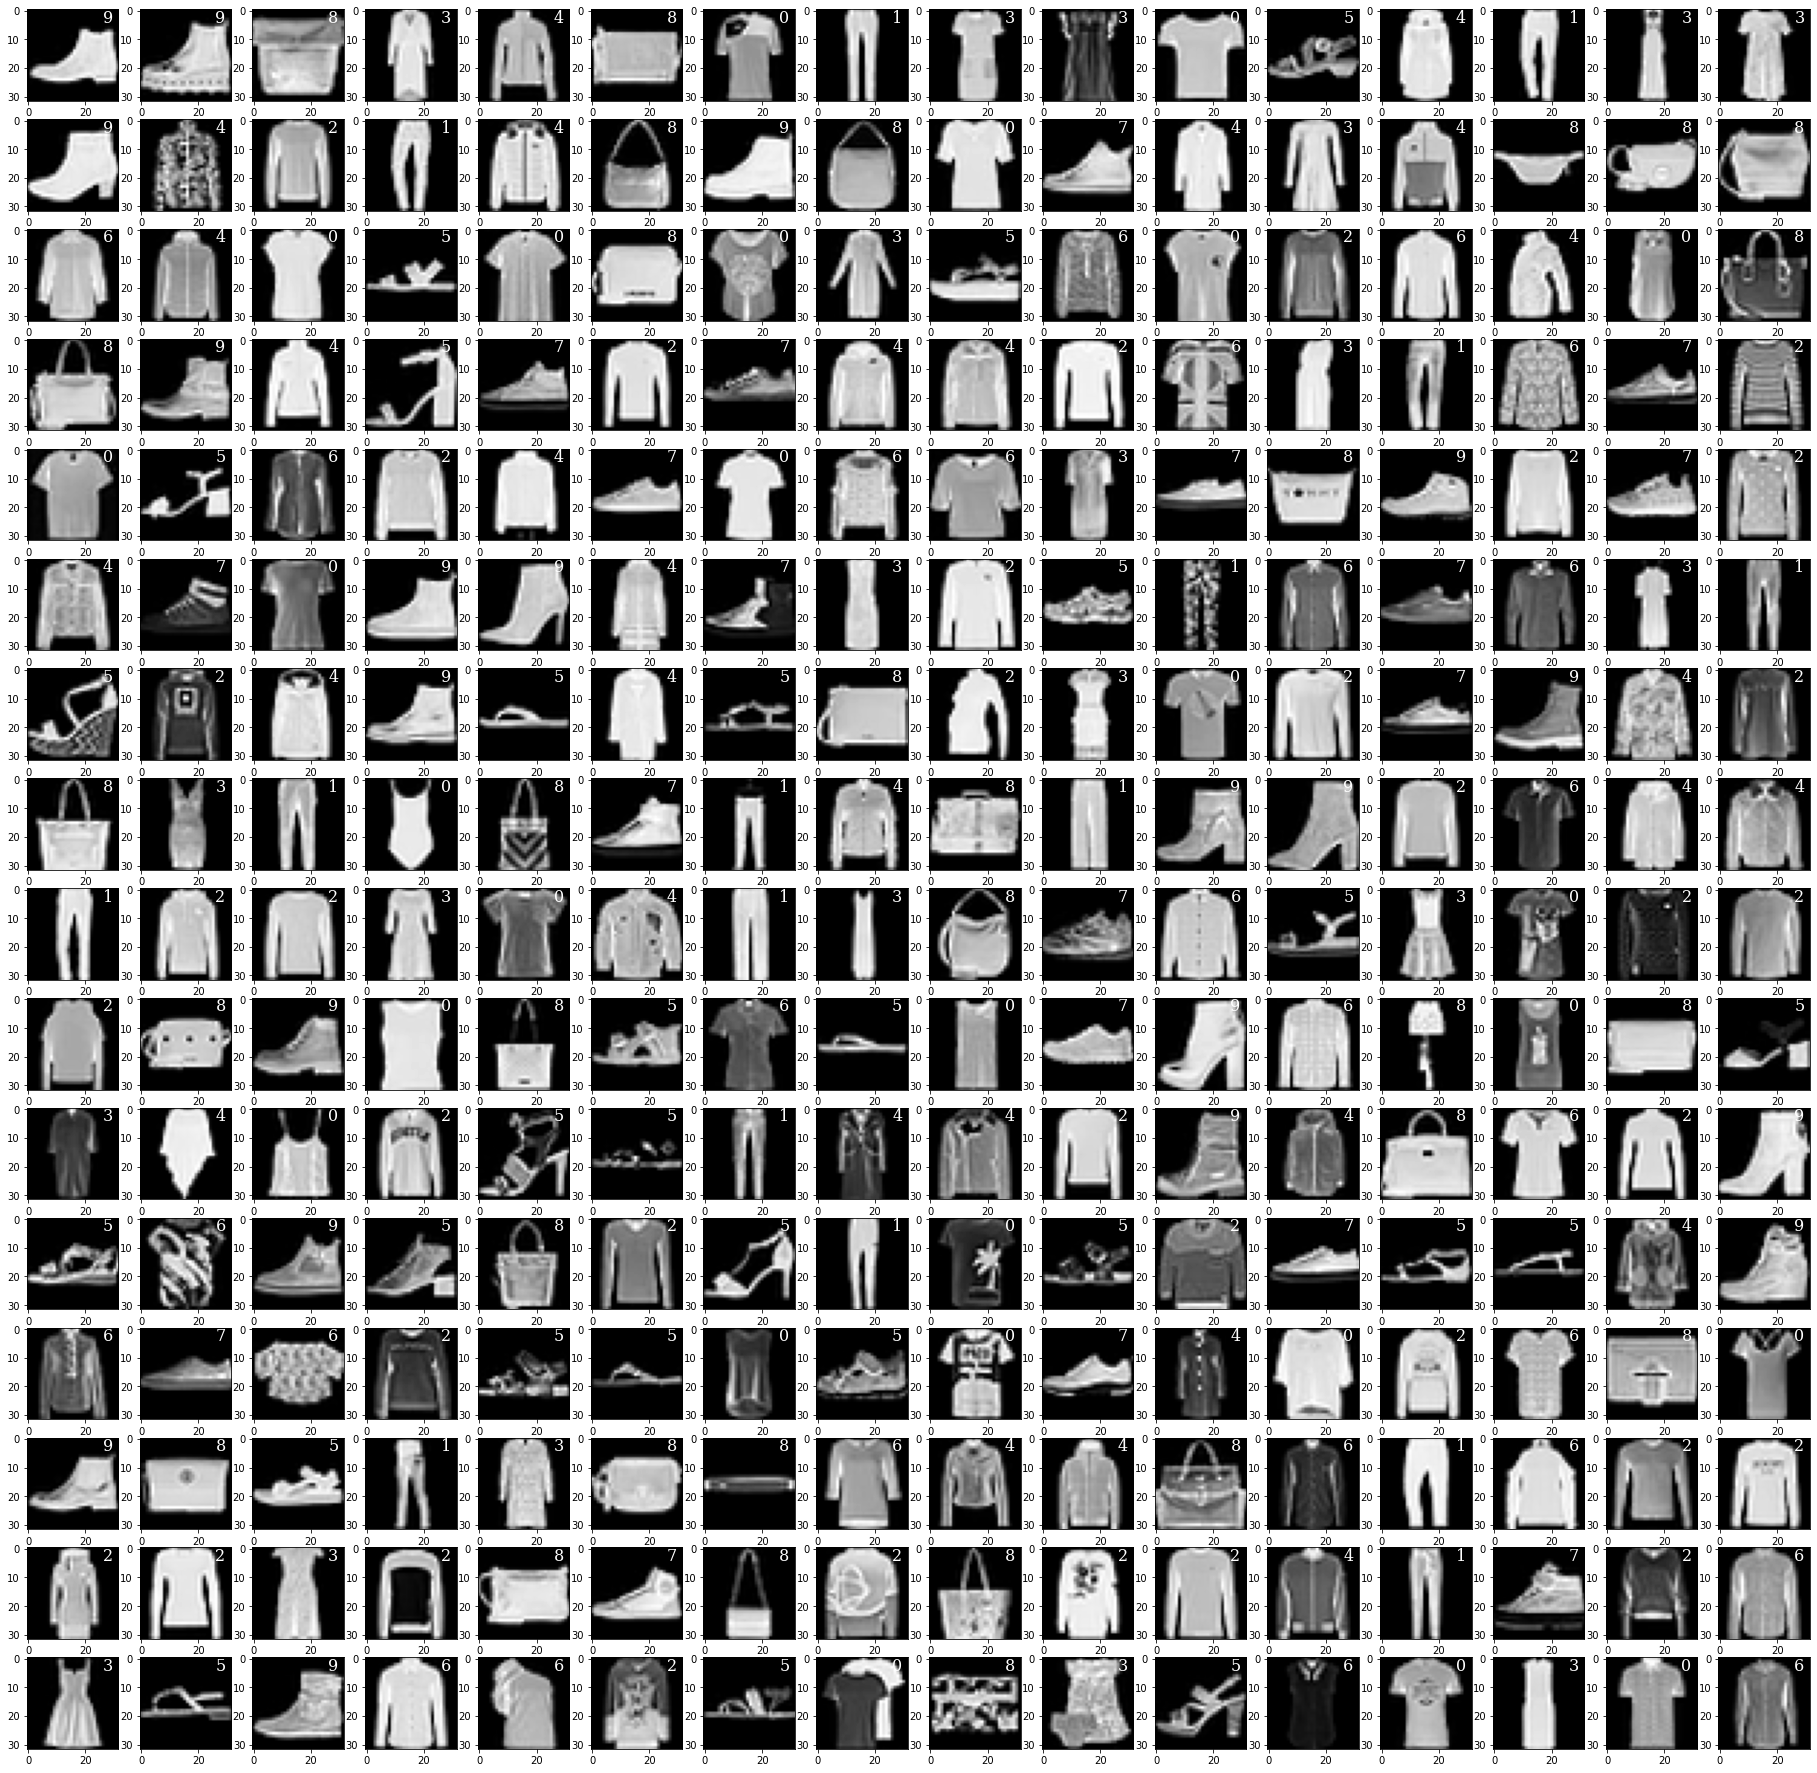

In [ ]:
font = {'family': 'serif',
        'color': 'white',
        'weight': 'normal',
        'size': 16,
        }

fig, axes = plt.subplots(grid_size, grid_size, figsize=(32,32))

for i, ax in enumerate(axes.flat):
    ax.imshow(img_list[i], cmap='gray')
    ax.text(
            26,4,
            int(class_list[i]),
            fontdict=font)

# Modelling

---



In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Rearranging the Data

In [7]:
plain_df = df.drop('class', axis=1)
train = plain_df.sample(frac=0.8,random_state=5)
test = plain_df.drop(train.index)
train.reset_index()
test.reset_index()
print(train.shape[0], test.shape[0])

56000 14000


In [8]:
train_list = train.values.tolist()
test_list = test.values.tolist()

## Setting up the Model

In [10]:
'''https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D'''

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(unique_dict['unique_number'])
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.build(input_shape = (32, 28, 28, 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           multiple                  0 (unused)
                                                                 
 max_pooling2d_3 (MaxPooling  multiple                 0 (unused)
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           multiple                  0 (unused)
                                                                 
 max_pooling2d_4 (MaxPooling  multiple                 0 (unused)
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           multiple                  0 (unused)
                                                                 
 max_pooling2d_5 (MaxPooling  multiple                

## Fitting

No idea whatsoever why it does this so with all due respect I quit

In [16]:
history = model.fit(
  train_list,
  epochs=10
)

Epoch 1/10


ValueError: ignored

## Visualizing Model Error

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()